<a href="https://colab.research.google.com/github/shreyanshu/DES/blob/master/NLP_Simple_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd

In [51]:
df_spam = pd.read_csv('SMSSpamCollection', sep='\t', header=None)

In [52]:
df_spam.columns = ['target', 'data']

In [53]:
df_spam

,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [54]:
import nltk
nltk.download('punkt')

df_spam["No_of_Characters"] = df_spam["data"].apply(len)
df_spam["No_of_Words"]=df_spam.apply(lambda row: nltk.word_tokenize(row["data"]), axis=1).apply(len)
df_spam["No_of_sentence"]=df_spam.apply(lambda row: nltk.sent_tokenize(row["data"]), axis=1).apply(len)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
df_spam.head()

,target,data,No_of_Characters,No_of_Words,No_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Figure size 1200x800 with 0 Axes>

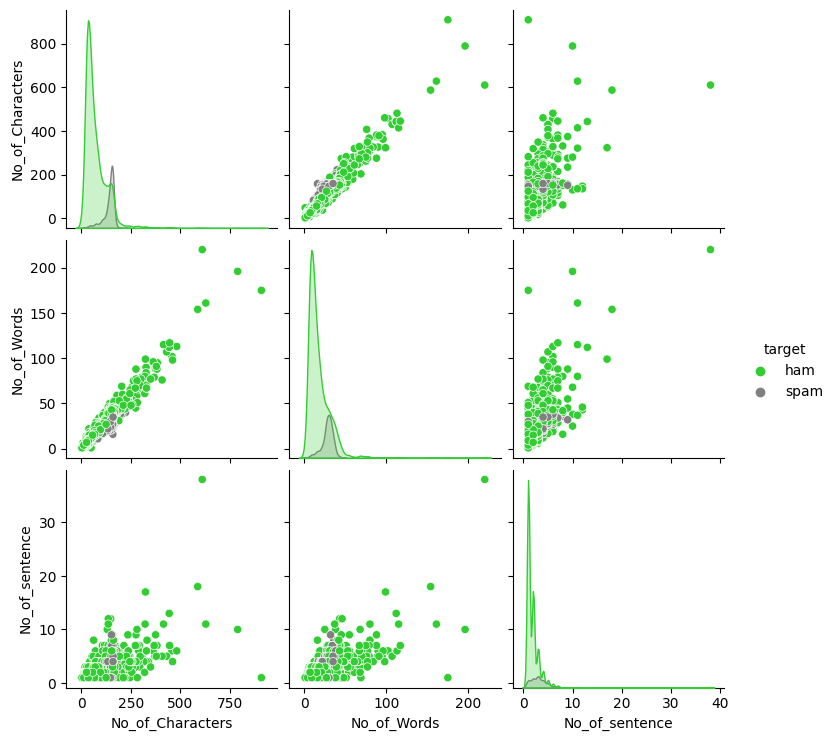

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
cols = ["limegreen", "gray"]
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df_spam, hue="target",palette=cols)
plt.show(fg)

<Axes: >

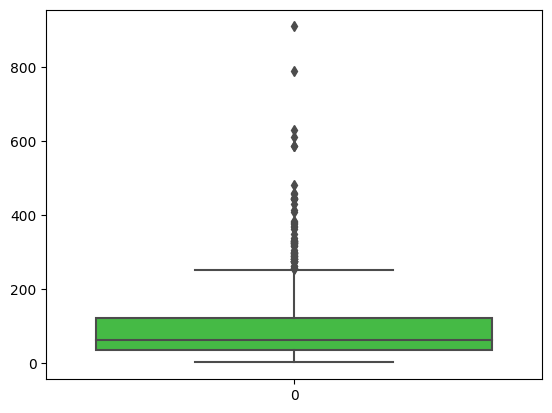

In [57]:
sns.boxplot(df_spam['No_of_Characters'], palette=cols)

In [58]:
df_spam = df_spam.query('No_of_Characters < 350')

In [59]:
df_spam

,target,data,No_of_Characters,No_of_Words,No_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


Data Cleaning 
* Remove Punctuations 
* Convert to lower case 

In [60]:
import re 
def Clean(Text):
    # Replacing all non-alphabetic characters with a space
    sms = re.sub('[^a-zA-Z]', ' ', Text) 
    #converting to lowecase
    sms = sms.lower() 
    # Removing extra white spaces
    sms = sms.split()
    sms = ' '.join(sms)
    return sms



In [61]:
df_spam.loc[:, 'Clean_data'] = df_spam['data'].apply(Clean)

<ipython-input-61-b8682dc84b3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam.loc[:, 'Clean_data'] = df_spam['data'].apply(Clean)


In [62]:
df_spam.head()

,target,data,No_of_Characters,No_of_Words,No_of_sentence,Clean_data
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...


In [63]:
df_spam["Tokenize_data"]=df_spam.apply(lambda row: nltk.word_tokenize(row["Clean_data"]), axis=1)

<ipython-input-63-7eb554b50275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam["Tokenize_data"]=df_spam.apply(lambda row: nltk.word_tokenize(row["Clean_data"]), axis=1)


In [64]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df_spam["Nostopword_data"] = df_spam["Tokenize_data"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-64-600d5bf374b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam["Nostopword_data"] = df_spam["Tokenize_data"].apply(remove_stopwords)


In [65]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

df_spam["Lemmatized_data"] = df_spam["Nostopword_data"].apply(lemmatize_word)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-65-faafee3a855f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam["Lemmatized_data"] = df_spam["Nostopword_data"].apply(lemmatize_word)


In [66]:
df_spam

,target,data,No_of_Characters,No_of_Words,No_of_sentence,Clean_data,Tokenize_data,Nostopword_data,Lemmatized_data
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4,this is the nd time we have tried contact u u ...,"[this, is, the, nd, time, we, have, tried, con...","[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, try, contact, u, u, pound, prize, c..."
5568,ham,Will ü b going to esplanade fr home?,36,9,1,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]","[b, go, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]","[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, somethi..."


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
vectorized_data = tfidf.fit_transform(df_spam.Lemmatized_data.apply(lambda x: ' '.join(x))).toarray()
#Let's have a look at our feature 
tfidf.get_feature_names_out().__len__()

6546

In [68]:
final_processed_df = pd.DataFrame(vectorized_data, columns=tfidf.get_feature_names_out()) 

In [69]:
final_processed_df

,aa,aah,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,aberdeen,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_spam["target"])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_processed_df, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [73]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_hat_lr = model_lr.predict(X_test)

confusion_matrix(y_test, y_hat_lr)

array([[951,   0],
       [ 50, 109]])

In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_hat_rf = model.predict(X_test)

confusion_matrix(y_test, y_hat_rf)

array([[951,   0],
       [ 25, 134]])

In [75]:
data = "URGENT! We are trying to contact you. Last weekends draw shows that you have won a £900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only"
tokenize_data=nltk.word_tokenize(Clean(data))
tokenize_data = remove_stopwords(tokenize_data)
tokenize_data = lemmatize_word(tokenize_data)

In [76]:
tokenize_data

['urgent',
 'try',
 'contact',
 'last',
 'weekend',
 'draw',
 'show',
 'prize',
 'guarantee',
 'call',
 'claim',
 'code',
 'valid',
 'hrs']

In [77]:
model.predict(tfidf.transform([' '.join(tokenize_data)]).toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [78]:
from sklearn.tree import plot_tree

In [79]:
sorted(list(zip(X_train.columns, model_lr.coef_[0])), key=lambda x:x[1])

[('ok', -1.6913209598392165),
 ('later', -1.6011161038453243),
 ('lt', -1.5547566698685353),
 ('gt', -1.54118976477653),
 ('sorry', -1.3369459888585895),
 ('say', -1.3293936991947748),
 ('home', -1.3259094617454341),
 ('come', -1.3123909262536821),
 ('da', -1.2989426919885223),
 ('go', -1.2875908202159223),
 ('sir', -1.2005057527504712),
 ('work', -1.188802772688666),
 ('get', -1.1017493749882523),
 ('way', -1.0723822517387815),
 ('oh', -1.0497851934224454),
 ('lor', -0.9829001792452808),
 ('much', -0.9618730095244309),
 ('hey', -0.9412654797553602),
 ('like', -0.9368588243943016),
 ('tell', -0.9024265375648003),
 ('well', -0.8730987755526267),
 ('still', -0.8350550241765307),
 ('finish', -0.8146248549968681),
 ('good', -0.8114758170583733),
 ('one', -0.8072110937706213),
 ('wat', -0.8022339932015401),
 ('yeah', -0.7726775867066753),
 ('lol', -0.7530477852612828),
 ('pls', -0.7288826253786643),
 ('sleep', -0.7252748363375505),
 ('happy', -0.7242510545980414),
 ('watch', -0.724234645160